# 4. Pre-Processing and Training Data

## Libraries

### Installations

In [1]:
#!pip install xlsxwriter

### Imports

In [2]:
#File and name management libraries
import os
import shutil
import glob
from pathlib import Path

#Math & data handling libraries
import pandas as pd
import numpy as np

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#dates and timeframe libraries
import datetime
import matplotlib.dates as mdates

#Assocations and correlations libraries
import ppscore as pps

#Machine learning libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pycaret.regression import *

#Other file formats libraries
import xlsxwriter

## Modeling Settings

### n-month ahead prediction

In [3]:
# Define n-month ahead prediction (1-6)
N_MONTH = 1
print(N_MONTH)

1


### Directories

In [4]:
#### Root derectory ####

# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print(ROOT_DIR)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01


In [5]:
#### File directory ####

#Define file name and location
file_csv = 'step3_eda_wti_price.csv'
file_path = '\\data\\interim\\'

#Set file name and location
f = ROOT_DIR + file_path + file_csv
print(f)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01\data\interim\step3_eda_wti_price.csv


In [6]:
#### Model directory ####
# Change direcotry to the '\models' folder
# Generate the name
model_name = 'regression_model_' + str(N_MONTH) + 'm'
model_path =  ROOT_DIR + '\\models\\' + model_name


#verwrite folder if exisits
if os.path.exists(model_path):
    shutil.rmtree(model_path)

#Make folder
try: 
    os.mkdir(model_path)
except OSError as error: 
    print(error)

os.chdir(model_path)
os.getcwd()

'D:\\gitProjects\\springboard_capstone_1\\Springboard_Capstone_01\\models\\regression_model_1m'

### Targe feature 

In [7]:
#Set target feature
TARGET_FEATURE = 'wti_price'

## Read Data

In [8]:
#cast csv to dataframe
df = pd.read_csv(f)

#convert 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors="raise")

#set Date as index
df.set_index('Date', drop=True, inplace=True)

#print shape of dataframe
print('Shape:',df.shape)

#display df head
display(df.head(7).round(2).T)

Shape: (271, 30)


Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01
wti_price,27.26,29.37,29.84,25.72,28.79,31.82,29.70
oil_production_opec,26.01,26.68,26.61,27.52,28.05,27.64,27.91
oil_production_nonopec,46.90,46.82,46.94,46.62,46.62,46.78,47.05
oil_production_world,73854.24,74470.54,74439.05,75116.13,75639.56,75360.22,75983.05
henry_hub_ng_price,2.42,2.66,2.79,3.04,3.59,4.29,3.99
oil_production_us,5.78,5.85,5.92,5.85,5.85,5.82,5.74
petrol_consumption_oecd,47.23,50.23,49.36,46.29,47.34,47.96,47.25
petrol_consumption_nonoecd,28.29,28.77,28.53,28.13,28.22,28.27,28.54
us_cpi,1.69,1.70,1.71,1.71,1.71,1.72,1.73
us_ppi,1.29,1.30,1.31,1.31,1.32,1.32,1.33


## Pre-process

#### Custom functions

In [9]:
def get_var_name(variable):
    '''This function gets a variable and prints its name'''
    globals_dict = globals()

    return [var_name for var_name in globals_dict if globals_dict[var_name] is variable]

In [10]:
def count_missing(df):
    ''' Count the number of missing values .isnull() in each column well as the percentages 
    Call pd.concat() to form a single table df with 'count' and '%' columns'''
    
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns=['count', '%']
    missing = missing.loc[missing['count'] > 0]
    missing.sort_values(by='count', ascending = False)
    
    return missing

In [11]:
def count_over_thershold(li, bounding_limit: tuple):
    '''This function gets a list and print how many items are larger than a thersold'''
    
    #counters
    n = len(li)
    m = 0    
    for i in li:
        if i >= bounding_limit[1] or i < bounding_limit[0] :
            m +=1
    pct = 100.0*m/n
    print(f'{pct:1.2f}% of items ({m}/{n}) are out of {bounding_limit}')   

In [12]:
def highlight_out_of_range(data, title:str, ylabel, bounding_limit: tuple, figsize = (15, 2)):
    '''This functions gets PPS score for target feature and plot a bar plot'''
    lower_bound = bounding_limit[0]
    upper_bound = bounding_limit[1]
    
    #Plot the scores for a select feature from PPS Matrix
    data= data.sort_values(ascending = False)

    #The value > thershold will be show with a different color.
    #So, the plot colors will be dynamically set based on the data

    #Create and empty list of colors
    colors = []

    #Set color for ratio values
    #Set "red" if value is max, otherwise "blue" (as default)
    for index, value in data.items():
        if value >= upper_bound or value <= lower_bound:
            colors.append('#f77088') #red for max
        else:
            colors.append('#66aabb') #blue as default

    #set chart size
    fig = plt.figure(figsize = figsize)

    #Pass the x and height values with color set to bar plotter
    plt.bar(data.index,data.values, width = .8, color=colors)

    #Rotate the x labels for better visuzlaizarion
    plt.xticks(rotation=90)

    #Set labels
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim([round(lower_bound), round(upper_bound)])
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.4)
    
    #Add axis lines
    #plt.axvline(x=0, c='k', ls='-', alpha=0.8)
    plt.axhline(y=0, c='gray', ls='-', alpha=0.8)

    #print number of values out of limits
    count_over_thershold(data, bounding_limit)

    #save the file
    plt.savefig(ylabel +'.png', dpi=300, bbox_inches = 'tight')
    
    #Show the plot
    plt.show()


In [13]:
def target_corr_coeff(df, feature):
    
    # Compute the correlation matrix
    corr = df.corr()
    y_scores = corr[feature]
    
    y_scores.drop(TARGET_FEATURE, inplace = True)
    
    return y_scores

In [14]:
def target_pps_score(df, feature):
    # Compute the PPS matrix
    matrix = pps.matrix(df)
    matrix_pps = matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    y_scores = matrix_pps[feature]
    
    y_scores.drop(TARGET_FEATURE, inplace = True)
    
    return y_scores

### Generate n-month future price data 

In [15]:
#Make a copy of dataframe
df_new = df.copy()

#Shift by n-month
df_new[TARGET_FEATURE] = df_new[TARGET_FEATURE].shift(-N_MONTH)

#print tail of 1,2,3,6-month future dataframes
display(df_new.tail(13))

,wti_price,oil_production_opec,oil_production_nonopec,oil_production_world,henry_hub_ng_price,oil_production_us,petrol_consumption_oecd,petrol_consumption_nonoecd,us_cpi,us_ppi,...,global_econ_policy_uncert_index,comp,copper_futures,djia,dxy,gold_futures,spx,wti_brent_price_spread,wti_crack_spread,brent_crack_spread
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,67.73,26.720000,64.862768,94719.485919,3.84,11.346986,45.655767,52.787012,2.72184,2.304027,...,203.423906,14639.072857,4.4655,34798.804286,92.17,1814.5,4363.712857,-2.68,468.1300,460.0900
2021-08-01,71.65,26.705000,64.338609,94237.671610,4.07,11.277405,45.816650,52.220958,2.73092,2.334078,...,213.007581,14856.517727,4.3700,35243.965455,92.63,1816.9,4454.206364,-3.02,471.8100,462.7500
2021-09-01,81.48,27.105000,64.156378,94516.549988,5.16,10.917534,46.135298,53.185308,2.74214,2.363054,...,202.797704,15023.538571,4.0890,34688.421429,94.23,1757.0,4445.543333,-2.84,471.0500,462.5300
2021-10-01,79.15,27.375000,65.239284,95800.424454,5.51,11.568579,46.222772,52.798628,2.76590,2.385176,...,193.205196,14879.012381,4.3590,35055.518095,94.12,1784.9,4460.707143,-2.06,504.7600,498.5800
2021-11-01,71.71,27.755000,65.584803,96440.588384,5.05,11.790052,46.753051,53.381337,2.78524,2.416337,...,225.540047,15814.932857,4.2805,35848.570952,95.99,1776.5,4667.386667,-1.90,504.7500,499.0500
2021-12-01,83.22,27.870000,64.875859,95872.930275,3.76,11.634403,47.684257,54.263432,2.80126,2.450757,...,263.150452,15474.431818,4.4635,35641.334091,95.97,1829.7,4674.772727,-2.46,472.9700,465.5900
2022-01-01,91.64,27.820000,64.632537,95815.453812,4.38,11.369338,44.630901,53.088229,2.81933,2.479733,...,232.732585,14531.377500,4.3265,35456.145000,96.54,1796.4,4573.815500,-3.29,489.9400,480.0700
2022-02-01,108.50,28.575000,64.870295,96802.295297,4.69,11.316119,46.754383,54.103039,2.84182,2.527202,...,189.550345,13898.728421,4.4545,34648.480526,96.71,1902.2,4435.980526,-5.49,535.8800,519.4100
2022-03-01,101.78,28.215000,65.728434,97207.699165,4.90,11.700795,46.236201,52.720855,2.87708,2.584460,...,330.526688,13623.263043,4.7520,34029.740435,98.31,1954.0,4391.265217,-8.75,679.1000,652.8500


### Handle Missing Values

#### Print missing values

In [16]:
count_missing(df_new)

,count,%
wti_price,1,0.369004


#### Impute missing values

In [17]:
dropped_row = df_new.dropna(axis = 0, inplace = False)
print('Before:', df_new.shape)
print('After:', dropped_row.shape)

Before: (271, 30)
After: (270, 30)


### Final Dataset

In [18]:
df = dropped_row.copy()

## EDA n-month future

### Associations with target feature

#### High Correlation Coeff

27.59% of items (8/29) are out of (-0.6, 0.6)


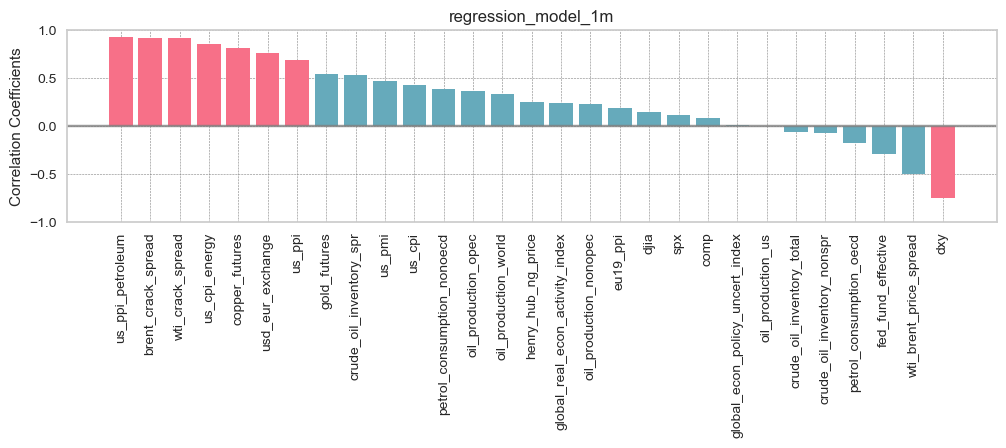

In [19]:
wti_corr_coeff = target_corr_coeff(df, TARGET_FEATURE)

highlight_out_of_range(data = wti_corr_coeff,
                       title = model_name,
                       ylabel = 'Correlation Coefficients',
                       bounding_limit = (-0.6,0.6),
                       figsize = (12, 2.5))

#### High PPS Score

0.00% of items (0/29) are out of (0, 0.6)


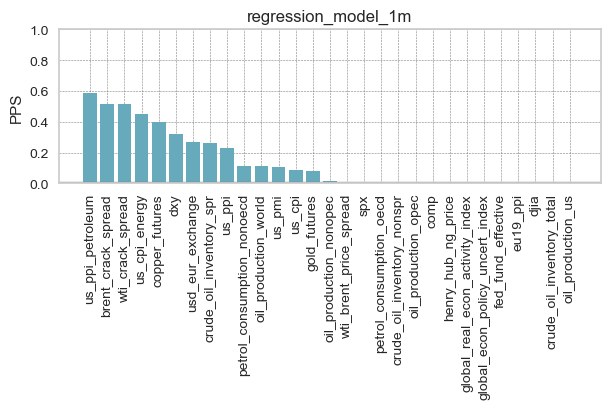

In [20]:
wti_pps_score = target_pps_score(df, TARGET_FEATURE)

highlight_out_of_range(data = wti_pps_score,
                       title = model_name,
                       ylabel = 'PPS',
                       bounding_limit = (0,0.6),
                       figsize = (7, 2))

## Train/Test Split

In [21]:
#expected 70-30 split sizes
print(round(len(df) * 0.7, 0))
print(round(len(df) * 0.3, 0))

189.0
81.0


In [22]:
model_name

'regression_model_1m'

In [23]:
#split data to 70$ train and 30% test sets
#... = train_test_split(X, y, test_size, random_state)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=TARGET_FEATURE),
                                                    df[TARGET_FEATURE], test_size=0.3,
                                                    random_state=47)

In [24]:
print('(X_train, X_test):\n',X_train.shape, X_test.shape)
print('\n(y_train, y_test):\n',y_train.shape, y_test.shape)

(X_train, X_test):
 (189, 29) (81, 29)

(y_train, y_test):
 (189,) (81,)


### Imputing missing feature (predictor) values
Impute missing values using scikit-learn. Learn values to impute from a train split and apply that to the test split.

In [25]:
display(count_missing(X_train))

,count,%


In [26]:
display(count_missing(X_test))

,count,%


In [27]:
#No missing data
X_tr = X_train.copy()
X_te = X_test.copy()

### Scale Data

In [28]:
def scale_train_test_dataframes(X_tr, X_te):
    '''This function gets a dataframe and normalized columns and return a new data frame'''
    
    #store column names
    names = X_tr.columns
    
    from sklearn.preprocessing import StandardScaler

    #Call the StandardScaler`s fit method on `X_tr` to fit the scaler
    #then use it's `transform()` method to apply the scaling to both the train and test split
    #data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively

    scaler = StandardScaler()
    
    #scale data using sklearn preprocessing module
    scaler.fit(X_tr)
    
    X_tr_scaled = scaler.transform(X_tr)
    
    X_te_scaled = scaler.transform(X_te)

    #create new df using scaled data
    X_tr_scaled_df = pd.DataFrame(X_tr_scaled, columns=names)
    X_te_scaled_df = pd.DataFrame(X_te_scaled, columns=names)

    #set index
    X_tr_scaled_df.set_index(X_tr.index, drop=True, inplace=True)
    X_te_scaled_df.set_index(X_te.index, drop=True, inplace=True)

    #return scaled dataframe
    return X_tr_scaled_df, X_te_scaled_df

In [29]:
X_tr_scaled, X_te_scaled_df = scale_train_test_dataframes(X_tr, X_te)

#### Plot scaled data

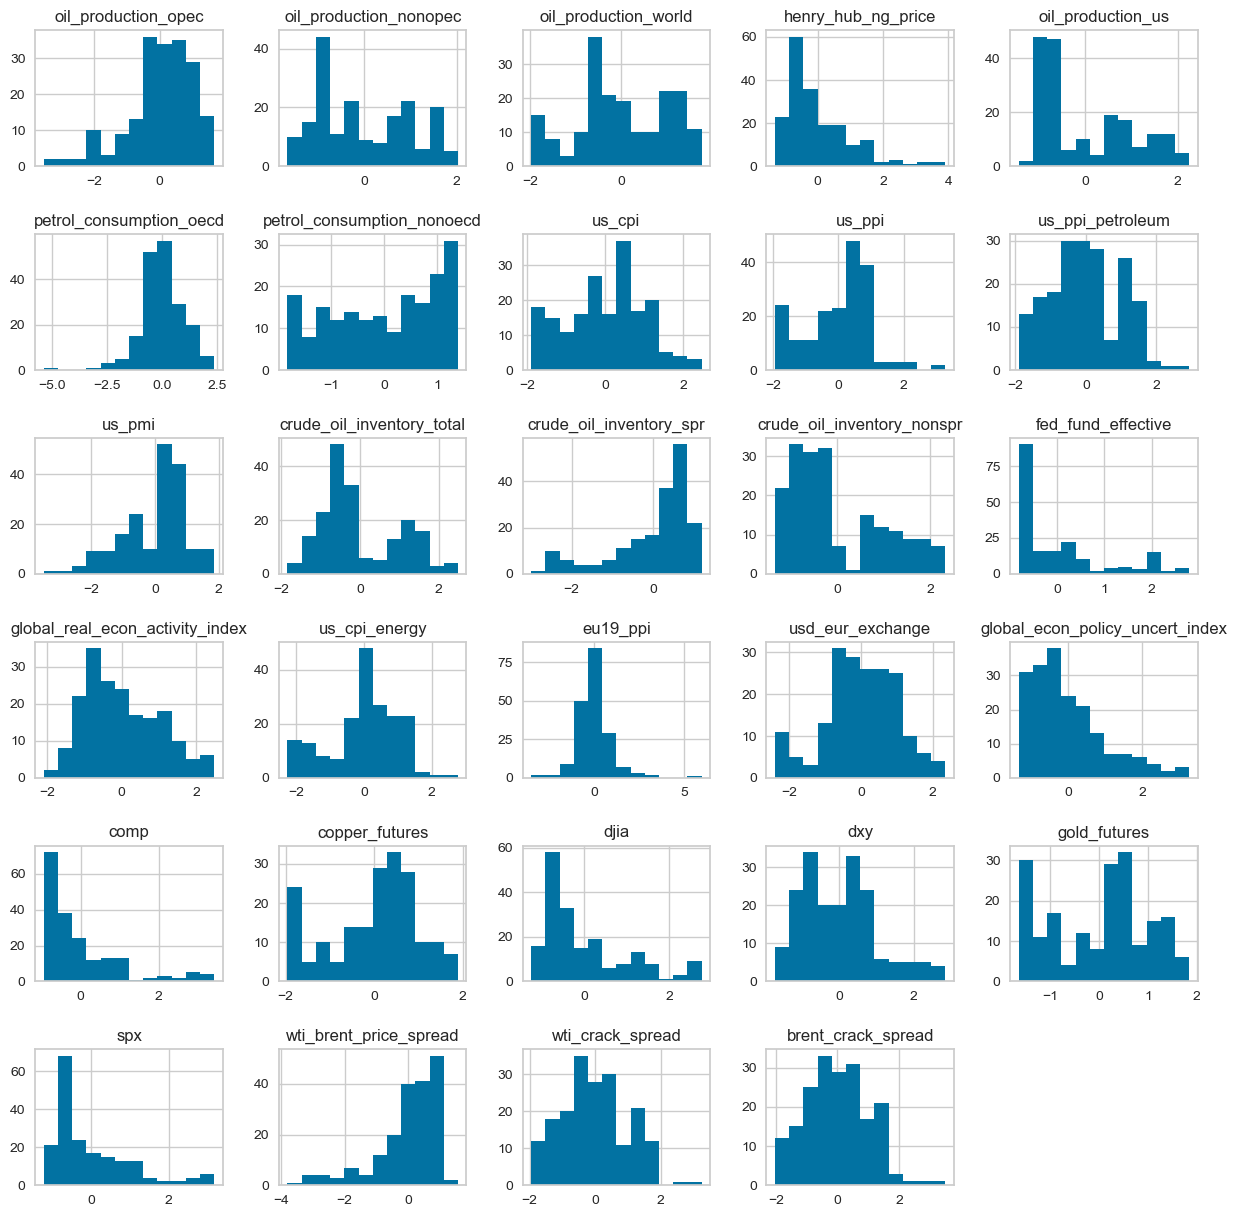

In [30]:
#Plot histogram of all  features
#Call plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
X_tr_scaled.hist(bins = 12, figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

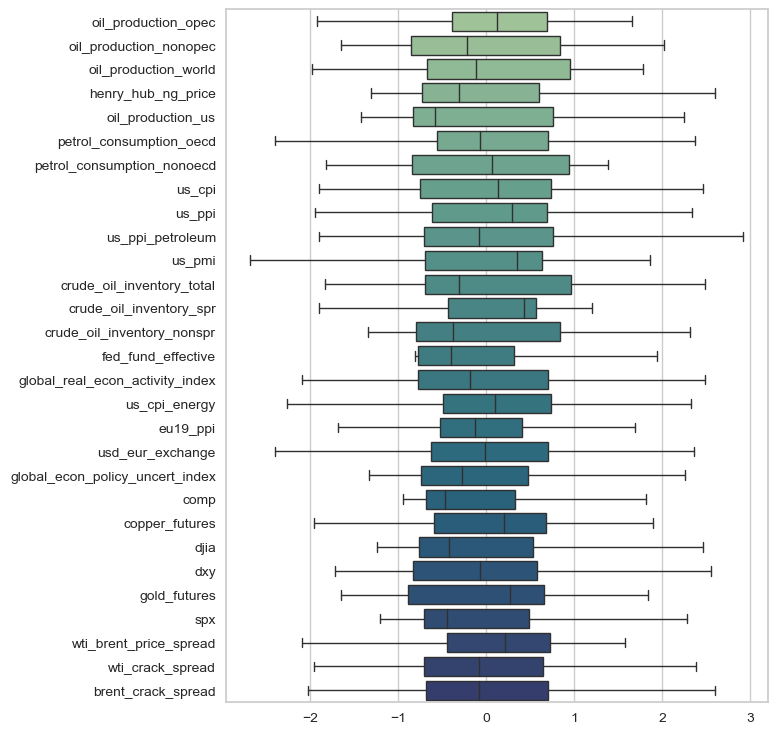

In [31]:
fig, ax = plt.subplots(figsize=(7,9))

sns.boxplot(data = X_tr_scaled,
            orient = 'h',
            width=0.8,
            palette='crest',
            linewidth= 1,
            sym = '')
plt.show()

## Conduct Regression Model in PyCaret

### Setup the session

In [32]:
#Setup Pycaret Regression session
#Transform dataset, normalize and split the dataset.
#Log experiments and plots for experiments to be viewed later with MLflow. 

reg_model = setup(data=df, 
                target=TARGET_FEATURE,
                session_id=786,
                transformation=True,
                normalize=True,
                train_size=0.7,
                log_plots=True)

,Description,Value
0,Session id,786
1,Target,wti_price
2,Target type,Regression
3,Data shape,"(270, 30)"
4,Train data shape,"(188, 30)"
5,Test data shape,"(82, 30)"
6,Numeric features,29
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


### Compare models

In [33]:
# Use compare_models() function to compare ML models and their perfomrance on the data
# Use the default fold value from 10 to 5 for cross-validation generator

# Store the top 5 models in top5.
# We plan to use this for Stacking and Blending purposes. 

top5 = compare_models(n_select=5, sort='RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.5075,40.4710,6.3150,0.9460,0.1150,0.0845,0.0740
gbr,Gradient Boosting Regressor,5.1025,48.2418,6.8486,0.9354,0.1201,0.0924,0.0540
lightgbm,Light Gradient Boosting Machine,5.2173,53.3653,7.2457,0.9289,0.1223,0.0933,0.0360
rf,Random Forest Regressor,5.2954,55.0556,7.3763,0.9261,0.1299,0.0962,0.0900
lr,Linear Regression,5.8957,56.6823,7.4881,0.9252,0.1551,0.1180,1.1460
ada,AdaBoost Regressor,5.7991,59.5745,7.6263,0.9205,0.1333,0.1076,0.0520
huber,Huber Regressor,5.8054,58.8903,7.6361,0.9222,0.1569,0.1162,0.0260
ridge,Ridge Regression,5.9442,59.6758,7.6896,0.9207,0.1550,0.1166,0.0280
br,Bayesian Ridge,6.0204,62.5989,7.8761,0.9165,0.1584,0.1173,0.0200
lasso,Lasso Regression,6.2585,68.0508,8.2175,0.9094,0.1603,0.1227,0.5780


In [34]:
# Case the result to a dataframe
compare_model_table = pull()

### Hyper-parameterization

Tune the top 5 models dynamically with a higher iteration rate (n_iter).

This is to find more optimal hyper parameters over a larger search space. 

In [35]:
#create an empty list with 5 elements
tuned_top5 = [None] * 5

#counter
i = 0 

#interate over the top5 and store the tuned models
for top in top5:
    #tune the model
    tuned_top5[i] = tune_model(top, n_iter=120, optimize='RMSE', fold=5) 
    
    # Save the dataframe to CSV
    tuned_name  = 'pycaret_tune_model_' + str(i+1)
    globals()[tuned_name] = pull()
    
    i += 1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4767,35.6244,5.9686,0.9567,0.0804,0.0676
1,3.6016,36.6182,6.0513,0.9483,0.0889,0.0600
2,4.3482,31.7973,5.6389,0.9520,0.0844,0.0722
3,6.4470,80.9879,8.9993,0.9112,0.2168,0.1636
4,4.2917,38.2074,6.1812,0.9419,0.1150,0.0810
Mean,4.6330,44.6470,6.5679,0.9420,0.1171,0.0889
Std,0.9567,18.2927,1.2289,0.0162,0.0513,0.0380


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.6779,34.3328,5.8594,0.9582,0.0887,0.0733
1,5.3189,59.4736,7.7119,0.9160,0.1146,0.0891
2,3.8750,23.5710,4.8550,0.9644,0.0919,0.0699
3,5.5547,57.3705,7.5743,0.9371,0.1880,0.1366
4,3.3128,20.7651,4.5569,0.9684,0.0884,0.0626
Mean,4.5479,39.1026,6.1115,0.9488,0.1143,0.0863
Std,0.8489,16.4252,1.3237,0.0196,0.0381,0.0266


Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.0395,45.9624,6.7796,0.9441,0.0968,0.0765
1,5.2368,63.5893,7.9743,0.9102,0.1152,0.0867
2,4.6568,32.5161,5.7023,0.9509,0.1029,0.0790
3,5.6617,57.0659,7.5542,0.9374,0.1773,0.1340
4,5.0891,46.3525,6.8083,0.9295,0.1196,0.0911
Mean,5.1368,49.0972,6.9637,0.9344,0.1224,0.0935
Std,0.3248,10.6378,0.7771,0.0140,0.0287,0.0209


Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.8397,41.2268,6.4208,0.9498,0.0884,0.0729
1,4.7935,52.8236,7.2680,0.9254,0.1071,0.0774
2,4.2358,27.6849,5.2616,0.9582,0.0891,0.0741
3,5.7356,60.7155,7.7920,0.9334,0.1975,0.1446
4,4.0213,32.0038,5.6572,0.9513,0.1077,0.0763
Mean,4.7252,42.8909,6.4799,0.9436,0.1180,0.0891
Std,0.5956,12.4008,0.9494,0.0122,0.0406,0.0278


Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.7322,67.2937,8.2033,0.9181,0.1426,0.1131
1,5.1848,49.8998,7.0640,0.9295,0.1604,0.1058
2,6.0945,53.8813,7.3404,0.9186,0.1291,0.1077
3,6.5391,72.1733,8.4955,0.9208,0.2117,0.1610
4,4.9277,40.1634,6.3375,0.9389,0.1320,0.1022
Mean,5.8957,56.6823,7.4881,0.9252,0.1551,0.1180
Std,0.7205,11.6559,0.7813,0.0080,0.0303,0.0218


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Combine top 5 models

#### Build blend models

In [36]:
# Building a blending model from our top 5 models and evaluate the results. 
# Blending models is an ensemble method of combining different machine learning algorithms.
# Use a majority vote to build consensus of final prediction values.

blender_specific = blend_models(estimator_list=tuned_top5[0:], fold=5, optimize='RMSE', choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.7849,36.0137,6.0011,0.9562,0.0872,0.0736
1,4.4661,47.8932,6.9205,0.9324,0.1016,0.0757
2,4.3926,28.0386,5.2951,0.9577,0.0908,0.0752
3,5.4943,53.3835,7.3064,0.9415,0.1802,0.1332
4,3.8538,29.3091,5.4138,0.9554,0.1047,0.0748
Mean,4.5984,38.9276,6.1874,0.9486,0.1129,0.0865
Std,0.5388,10.0889,0.8024,0.0100,0.0343,0.0234


In [37]:
# Case the result to a dataframe
pycaret_blend_model = pull()

In [38]:
# Below is a view of the model parameters. 
print(blender_specific)
display(blender_specific)

VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=786)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(max_depth=4,
                                                       max_features='sqrt',
                                                       min_impurity_decrease=0.4,
                                                       min_samples_leaf=2,
                                                       min_samples_split=10,
                                                       n_estimators=200,
                                                       random_state=786,
                                                       subsample=0.9)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(b...
                                           min_split_gain=0.8, n_estimators=300,
                 

VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=786)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(max_depth=4,
                                                       max_features='sqrt',
                                                       min_impurity_decrease=0.4,
                                                       min_samples_leaf=2,
                                                       min_samples_split=10,
                                                       n_estimators=200,
                                                       random_state=786,
                                                       subsample=0.9)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(b...
                                           min_split_gain=0.8, n_estimators=300,
                                           num_leaves=50, random_state=786,
                                           reg_alpha=1e-06, reg_lambda=0.1)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(bootstrap=False,
                                                   criterion='mae', max_depth=9,
                                                   max_features='log2',
                                                   min_impurity_decrease=0,
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   n_jobs=-1,
                                                   random_state=786)),
                            ('Linear Regression', LinearRegression(n_jobs=-1))],
                n_jobs=-1)

#### Build stack models

In [39]:
# Build a stacking model from our top 5 models and evaluate the results.
# Stacking models is an ensemble method of using meta learning.
# A meta model is created using multiple base estimators to generate the final prediction.

stacker_specific = stack_models(estimator_list=tuned_top5[1:],
                                meta_model=tuned_top5[0],
                                fold=5,
                                optimize='RMSE',
                                choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9086,23.2940,4.8264,0.9717,0.0643,0.0563
1,5.3399,61.0785,7.8153,0.9138,0.1114,0.0851
2,4.1576,26.6576,5.1631,0.9597,0.0903,0.0729
3,5.7948,61.4996,7.8422,0.9326,0.1865,0.1380
4,3.7863,26.4179,5.1398,0.9598,0.1006,0.0716
Mean,4.5974,39.7895,6.1574,0.9475,0.1106,0.0848
Std,0.8137,17.5949,1.3699,0.0212,0.0410,0.0281


In [40]:
# Case the result to a dataframe
pycaret_stack_model = pull()

In [41]:
# Below is a view of the model parameters. 
print(stacker_specific)
display(stacker_specific)

StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(max_depth=4,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.4,
                                                         min_samples_leaf=2,
                                                         min_samples_split=10,
                                                         n_estimators=200,
                                                         random_state=786,
                                                         subsample=0.9)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(bagging_fraction=1.0,
                                             bagging_freq=5,
                                             feature_fraction=0.6,
                                         

StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(max_depth=4,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.4,
                                                         min_samples_leaf=2,
                                                         min_samples_split=10,
                                                         n_estimators=200,
                                                         random_state=786,
                                                         subsample=0.9)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(bagging_fraction=1.0,
                                             bagging_freq=5,
                                             feature_fraction=0.6,
                                             learning_...
                                             reg_lambda=0.1)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(bootstrap=False,
                                                     criterion='mae',
                                                     max_depth=9,
                                                     max_features='log2',
                                                     min_impurity_decrease=0,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_jobs=-1,
                                                     random_state=786)),
                              ('Linear Regression',
                               LinearRegression(n_jobs=-1))],
                  final_estimator=ExtraTreesRegressor(n_jobs=-1,
                                                      random_state=786),
                  n_jobs=-1, passthrough=True)

### Evaluare models

#### Evaluate blend model

In [42]:
evaluate_model(blender_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Evaluate stack model

In [43]:
evaluate_model(stacker_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Evaluate the performances

cooks: blend vs stack


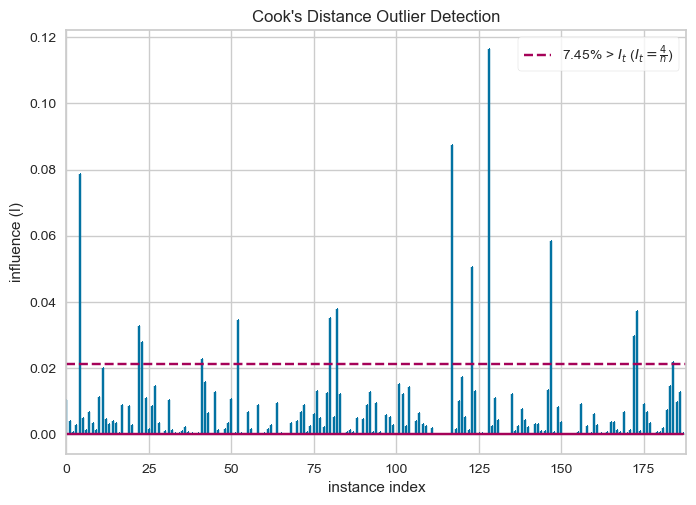

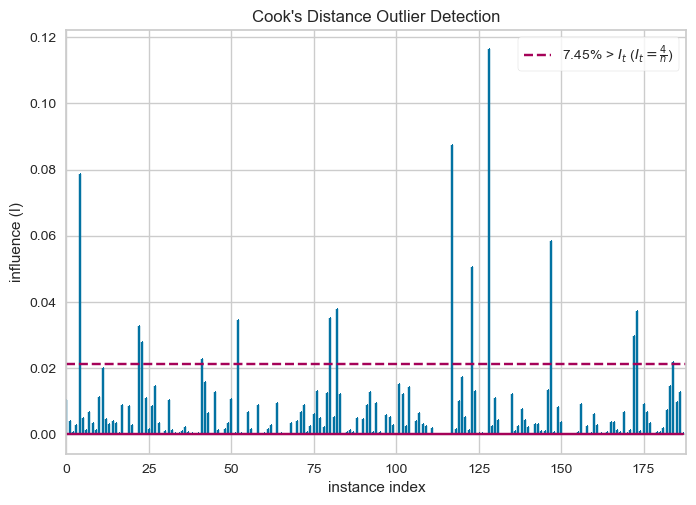

manifold: blend vs stack


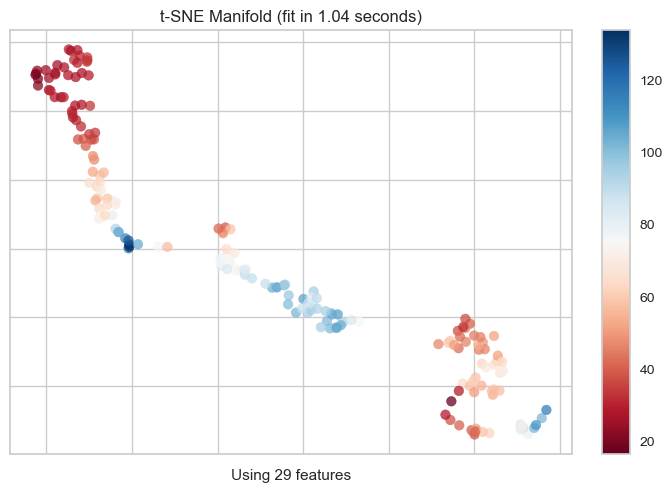

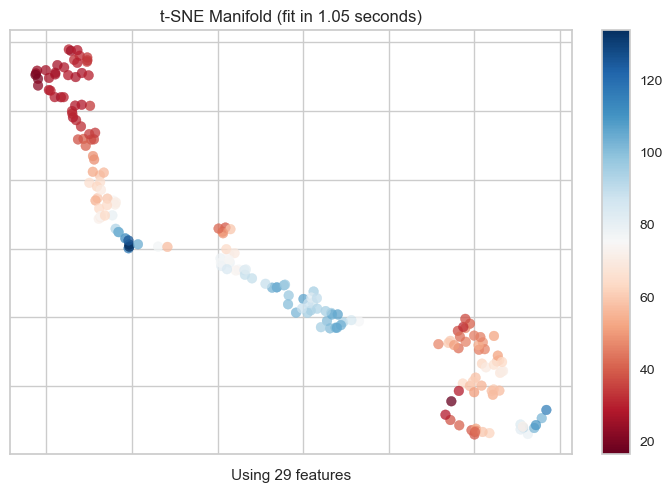

In [44]:
print('cooks: blend vs stack')
plot_model(blender_specific, plot='cooks', verbose=True, scale=1)
plot_model(stacker_specific, plot='cooks', verbose=True, scale=1)

print('manifold: blend vs stack')
plot_model(blender_specific, plot='manifold', verbose=True, scale=1)
plot_model(stacker_specific, plot='manifold', verbose=True, scale=1)

residuals: blend vs stack


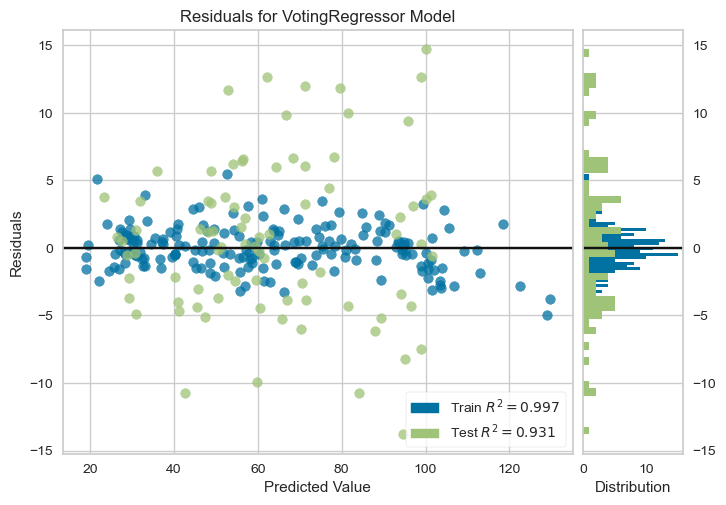

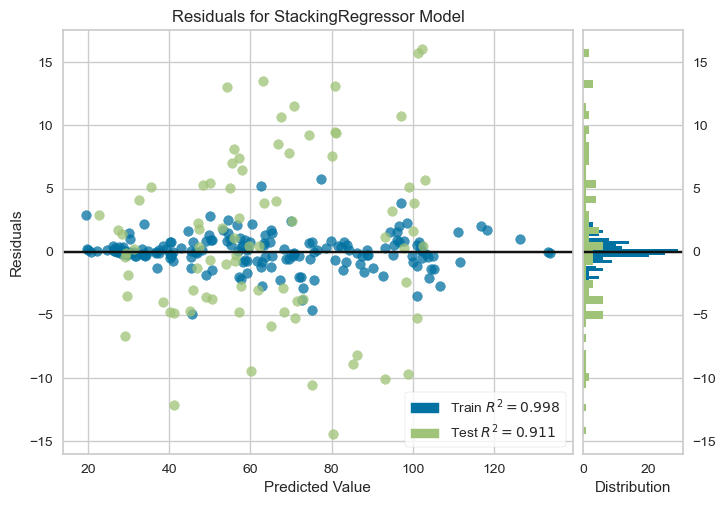

error: blend vs stack


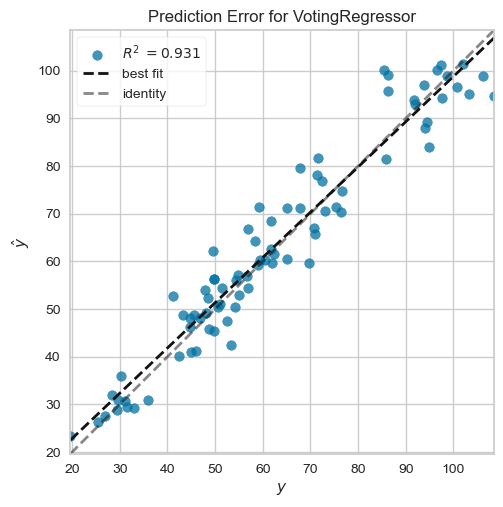

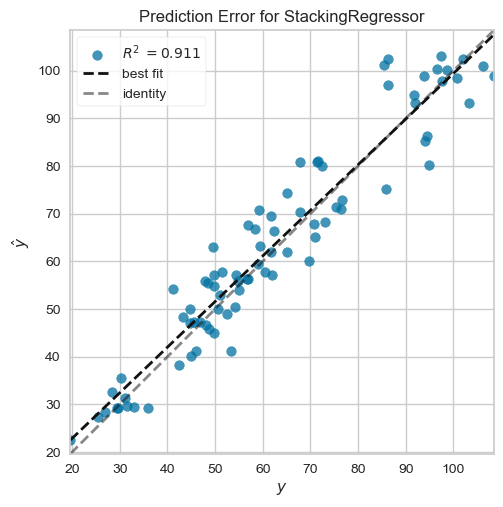

learning: blend vs stack


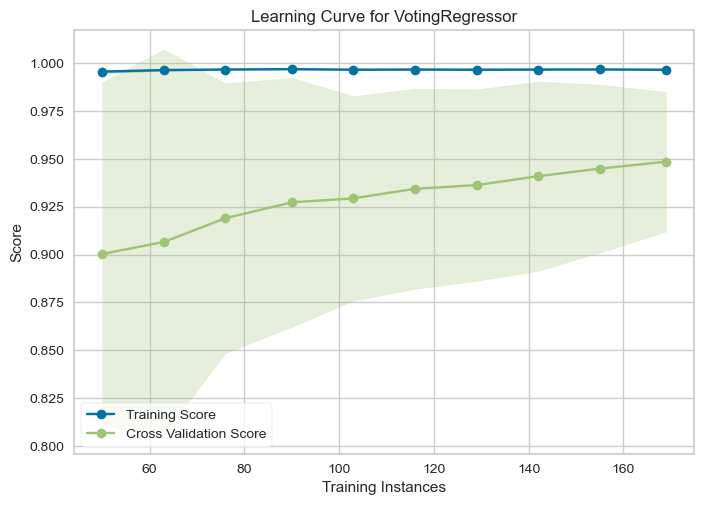

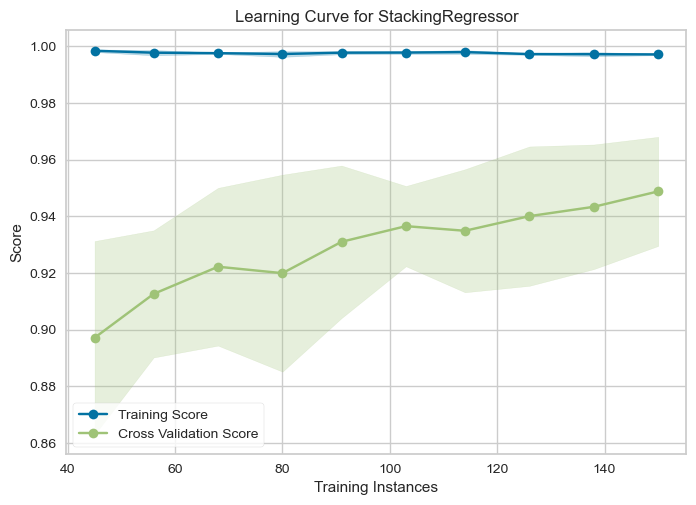

In [45]:
# Use Pycaret's built in plot_model() function to generate side-by-side plots:
# Dispaly Residuals chart, Prediction Error and Cross Validation (learning) charts.
print('residuals: blend vs stack')
plot_model(blender_specific, plot='residuals', scale=1)
plot_model(stacker_specific, plot='residuals', scale=1)

print('error: blend vs stack')
plot_model(blender_specific, plot='error', scale=1)
plot_model(stacker_specific, plot='error', scale=1)

print('learning: blend vs stack')
plot_model(blender_specific, plot='learning', scale=1)
plot_model(stacker_specific, plot='learning', scale=1)

In [46]:
# Execute the predict_model() function to use the blender model to generate the predicted values. 
pred_tunded_blender = predict_model(blender_specific)
pycaret_pred_blend = pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,4.5871,34.2862,5.8554,0.9308,0.0930,0.0773


In [47]:
# Execute the predict_model() function to use the stack model to generate the predicted values. 
pred_tunded_stacker = predict_model(stacker_specific, verbose = True)
pycaret_pred_stack = pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,5.2775,44.2081,6.6489,0.9107,0.1042,0.0881


#### Set the final model

In [48]:
# Set the final model based on the performance train and test.
print('1: blender_specific')
print('2: stacker_specific')
option = 2

1: blender_specific
2: stacker_specific


In [49]:
#choose the final ensemble meta-estimator 
if option == 1:
    ensemble = blender_specific
elif option ==2:
    ensemble = stacker_specific

In [50]:
#The finalize_model() function trains the model on the entire dataset. 
finalized_model = finalize_model(ensemble)
#display(finalized_model)

In [51]:
#trains the model on the entire dataset by setting data = df
pred_finalized_model = predict_model(finalized_model, data=df, verbose = True)
pycaret_pred_finalized = pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.9828,1.9863,1.4094,0.9971,0.0246,0.0164


## Save the final model

In [52]:
# Save pipeline
save_model(finalized_model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\Farid\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['oil_production_opec',
                                              'oil_production_nonopec',
                                              'oil_production_world',
                                              'henry_hub_ng_price',
                                              'oil_production_us',
                                              'petrol_consumption_oecd',
                                              'petrol_consumption_nonoecd',
                                              'us_cpi', 'us_ppi',
                                              'us_ppi_petroleum', 'us_pmi',
                                              'crude_o...
                                                               reg_lambda=0.1)),
                                                ('Random Forest Regressor',
                                 

## Save Pycaret tables to Excel

In [53]:
with pd.ExcelWriter(model_path + '\\pycaret_tables.xlsx', engine='xlsxwriter') as writer:
    #Write each dataframe to one excell sheet.
    compare_model_table.to_excel(writer, sheet_name='compare_models')
    pycaret_tune_model_1.to_excel(writer, sheet_name='tuned_1')
    pycaret_tune_model_2.to_excel(writer, sheet_name='tuned_2')
    pycaret_tune_model_3.to_excel(writer, sheet_name='tuned_3')
    pycaret_tune_model_4.to_excel(writer, sheet_name='tuned_4')
    pycaret_tune_model_5.to_excel(writer, sheet_name='tuned_5')
    pycaret_blend_model.to_excel(writer, sheet_name='blend_model') 
    pycaret_stack_model.to_excel(writer, sheet_name='stack_model')
    pycaret_pred_blend.to_excel(writer, sheet_name='pred_blend')
    pycaret_pred_stack.to_excel(writer, sheet_name='pred_stack')
    pycaret_pred_finalized.to_excel(writer, sheet_name='pred_final')